# Exercise 8: Algebra
# Duy Tommy Tran

#### Importing library

In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
from scipy import linalg as la

from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib notebook
%matplotlib inline

In [2]:
# Defining some figure parameters
mpl.rcParams.update({'figure.figsize': (10.0, 7),                   # Figuresize
                     'legend.fontsize': 17, 'legend.handlelength': 3, # Legend
                     'xtick.labelsize': 15, 'ytick.labelsize': 15,    # Tick-sizes of the axes
                     'font.size': 15})                                # Fontsize

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [3]:
N = 1000

mu = 0        # mean
sigma1 = 1    # std
sigma2 = 3

x1 = np.random.normal(mu, sigma1, N)
x2 = x1 + np.random.normal(mu, sigma2, N)
x3 = 2*x1 + x2

X = np.vstack((x1, x2, x3))

In [4]:
# Covariance matrix
cov = np.cov(X)

# The eigenvalues and eigenvectors of the covariance matrix
l, V = la.eig(cov)
l = np.real_if_close(l)

print(f'Covariance:\n {cov} \n')
print(f'Eigenvalues:\n {l} \n')
print(f'Eigenvectors:\n {V} \n')

Covariance:
 [[ 1.05912604  1.27954529  3.39779738]
 [ 1.27954529 10.58996892 13.14905951]
 [ 3.39779738 13.14905951 19.94465426]] 

Eigenvalues:
 [ 2.96557343e+01 -5.90456793e-16  1.93801488e+00] 

Eigenvectors:
 [[-0.12208433 -0.81649658  0.56429491]
 [-0.56903297 -0.40824829 -0.71381707]
 [-0.81320163  0.40824829  0.41477275]] 



In [5]:
# SVD decomposition
U, S, Vt = np.linalg.svd(X)

# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2/(N-1)
# The matrix U already contains the eigenvectors
V_svd = U

print(f'Eigenvalues:\n {l_svd} \n')
print(f'Eigenvectors:\n {V_svd} \n')

Eigenvalues:
 [2.96580500e+01 1.94422630e+00 2.99563951e-31] 

Eigenvectors:
 [[-0.12216155  0.5642782  -0.81649658]
 [-0.56893529 -0.71389493 -0.40824829]
 [-0.81325838  0.41466147  0.40824829]] 



In [6]:
# Compare Eigenvalues
print(f'Eigendecomposition:\n {l}')
print(f'SVD:\n {l_svd} \n')

print('Two of the values are similar, but one of them are not. \n \n')


# Compare Eigenvectors
print(f'Eigendecomposition:\n {V}')
print(f'SVD:\n {V_svd} \n')

print('They are similar.')

Eigendecomposition:
 [ 2.96557343e+01 -5.90456793e-16  1.93801488e+00]
SVD:
 [2.96580500e+01 1.94422630e+00 2.99563951e-31] 

Two of the values are similar, but one of them are not. 
 

Eigendecomposition:
 [[-0.12208433 -0.81649658  0.56429491]
 [-0.56903297 -0.40824829 -0.71381707]
 [-0.81320163  0.40824829  0.41477275]]
SVD:
 [[-0.12216155  0.5642782  -0.81649658]
 [-0.56893529 -0.71389493 -0.40824829]
 [-0.81325838  0.41466147  0.40824829]] 

They are similar.


In [7]:
# Variability percentage
Lambda = np.diag(l_svd)
for i in range(3):
    print(f'Principal component {i}: {"{:.2f}".format(Lambda[i, i]/Lambda.trace()*100)}% of total variability')

print('\nThe first principal component itself is close to 100%. ')
print('This is because x1 is directly from a random distribution, while x2 and x3 are a function of x1 and each other, so x1 will dominate the total variability.')

Principal component 0: 93.85% of total variability
Principal component 1: 6.15% of total variability
Principal component 2: 0.00% of total variability

The first principal component itself is close to 100%. 
This is because x1 is directly from a random distribution, while x2 and x3 are a function of x1 and each other, so x1 will dominate the total variability.


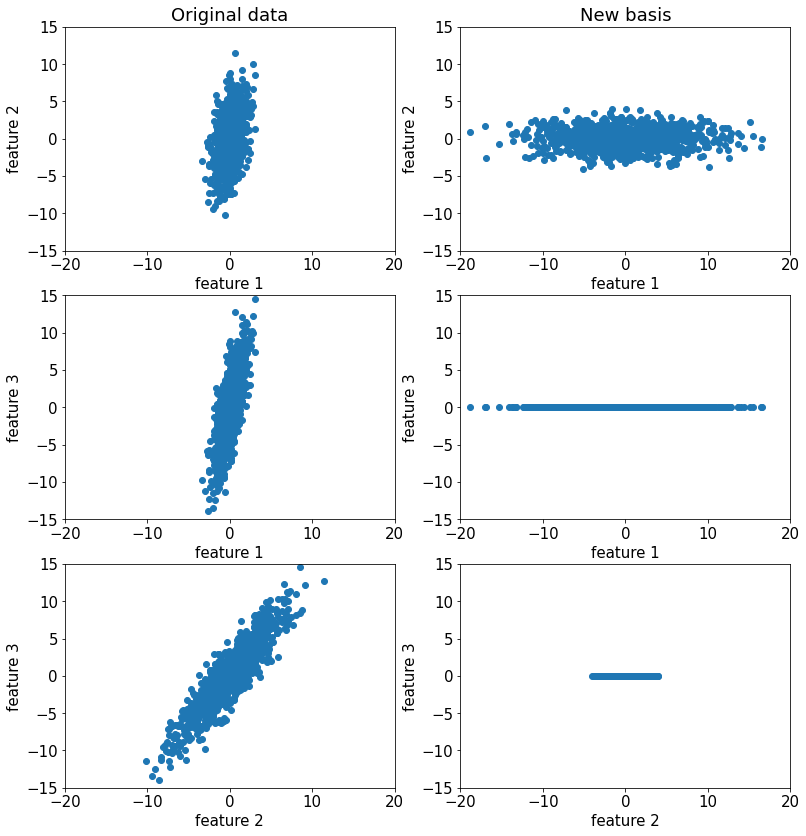

In [8]:
XP = np.dot(V_svd.T, X)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13,14))
ax00, ax01, ax10, ax11, ax20, ax21 = axes.flatten()
plt.setp(axes, xlim=(-20,20), ylim=(-15,15))

ax00.set_title('Original data')
ax00.scatter(X[0,:], X[1,:])
ax00.set_xlabel('feature 1')
ax00.set_ylabel('feature 2')

ax10.scatter(X[0,:], X[2,:])
ax10.set_xlabel('feature 1')
ax10.set_ylabel('feature 3')

ax20.scatter(X[1,:], X[2,:])
ax20.set_xlabel('feature 2')
ax20.set_ylabel('feature 3')

ax01.set_title('New basis')
ax01.scatter(XP[0,:], XP[1,:])
ax01.set_xlabel('feature 1')
ax01.set_ylabel('feature 2')

ax11.scatter(XP[0,:], XP[2,:])
ax11.set_xlabel('feature 1')
ax11.set_ylabel('feature 3')

ax21.scatter(XP[1,:], XP[2,:])
ax21.set_xlabel('feature 2')
ax21.set_ylabel('feature 3')

plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [9]:
# Random noise, uncorrelated normal distribution
noise = []

for i in range(10):
    noise.append(npr.normal(loc=0, scale=1/20, size=N))

X_nD = np.vstack([x1, x2, x3, *noise])

In [10]:
# PCA: eigendecomposition

# Covariance matrix
cov_nD = np.cov(X_nD)

# Eigenvectors and eigenvalues
l_nD, V_nD = la.eig(cov_nD)
l_nD = np.real_if_close(l_nD)

print(f'Eigenvalues:\n {l_nD} \n')
#print(f'Eigenvectors:\n {V_nD} \n')

Eigenvalues:
 [ 2.96557626e+01  1.93803563e+00 -1.04796693e-15  2.99919825e-03
  2.94234419e-03  2.76402198e-03  2.62174300e-03  2.51552736e-03
  2.40904227e-03  2.35261789e-03  2.12163644e-03  2.18176299e-03
  2.23450799e-03] 



In [11]:
# SVD
U_nD, S_nD, Vt = np.linalg.svd(X_nD)

# Rescaling S
l_svd_nD = S_nD**2/(N-1)

# Eigenvectors
V_svd_nD = U_nD

print(f'Eigenvalues: \n {l_svd_nD}')
#print(f'Eigenvectors:\n {V_svd_nD} \n')

Eigenvalues: 
 [2.96580786e+01 1.94424575e+00 3.01405189e-03 2.94790259e-03
 2.76528740e-03 2.62652814e-03 2.51589306e-03 2.41089801e-03
 2.35262012e-03 2.23515853e-03 2.18192850e-03 2.12504360e-03
 2.93581762e-31]


In [12]:
# Comparing the eigenvalues
print(f'Eigendecomposition: \n {l_nD} \n')
print(f'SVD: \n {l_svd_nD}')

Eigendecomposition: 
 [ 2.96557626e+01  1.93803563e+00 -1.04796693e-15  2.99919825e-03
  2.94234419e-03  2.76402198e-03  2.62174300e-03  2.51552736e-03
  2.40904227e-03  2.35261789e-03  2.12163644e-03  2.18176299e-03
  2.23450799e-03] 

SVD: 
 [2.96580786e+01 1.94424575e+00 3.01405189e-03 2.94790259e-03
 2.76528740e-03 2.62652814e-03 2.51589306e-03 2.41089801e-03
 2.35262012e-03 2.23515853e-03 2.18192850e-03 2.12504360e-03
 2.93581762e-31]


In [13]:
# Variability percentage
Lambda = np.diag(l_svd_nD)
for i in range(13):
    print(f'Component {i}: {"{:.3f}".format(Lambda[i, i]/Lambda.trace()*100)}% of total variability')

print(f'\nThe standard deviation with the random noise is in such small factor so they dont contribute alot to the total variability.')

Component 0: 93.773% of total variability
Component 1: 6.147% of total variability
Component 2: 0.010% of total variability
Component 3: 0.009% of total variability
Component 4: 0.009% of total variability
Component 5: 0.008% of total variability
Component 6: 0.008% of total variability
Component 7: 0.008% of total variability
Component 8: 0.007% of total variability
Component 9: 0.007% of total variability
Component 10: 0.007% of total variability
Component 11: 0.007% of total variability
Component 12: 0.000% of total variability

The standard deviation with the random noise is in such small factor so they dont contribute alot to the total variability.


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [14]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 